# Project 4: Car Sales Analysis

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install or upgrade**

In [ ]:
# If you don't care to create a virtual environment, here is what you need to do to download the libraries

# Run these directly in a cell to download the libraries:

#!pip install tensorflow
#!pip install pyspark
#!pip install scikit-optimize (for skopt)
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

# To update them, run this (with your desired library):

#!pip install --upgrade scikit-learn

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

## 1. Visualize the data

- [x] **View the data**

In [20]:
import pandas as pd
import numpy as np
import math as ma
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("car_sales.csv")

df

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

- [x] **Check the data types**

In [16]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

- [x] **Count Occurrences**

In [22]:
df["Gender"].value_counts()

for column in df.columns:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n{'-'*40}\n")

Value counts for Car_id:
Car_id
C_CND_000001    1
C_CND_015935    1
C_CND_015944    1
C_CND_015943    1
C_CND_015942    1
               ..
C_CND_007967    1
C_CND_007966    1
C_CND_007965    1
C_CND_007964    1
C_CND_023906    1
Name: count, Length: 23906, dtype: int64
----------------------------------------

Value counts for Date:
Date
9/5/2023      190
11/10/2023    175
12/29/2023    151
12/11/2023    140
11/24/2023    135
             ... 
6/21/2022       5
7/12/2023       5
12/9/2022       5
7/8/2022        5
6/29/2023       5
Name: count, Length: 612, dtype: int64
----------------------------------------

Value counts for Customer Name:
Customer Name
Thomas           92
Emma             90
Lucas            88
Nathan           80
Louis            76
                 ..
Adelin            1
Zakarya           1
Paule             1
Noeline           1
Djamel Epoine     1
Name: count, Length: 3021, dtype: int64
----------------------------------------

Value counts for Gender:
Gender


## 2. Clean the data

- [x] **Check if there are any NaN values in any columns. Use Imputation to fill them if necessary.**

In [306]:
# Go through all of the df columns and put the columns and their respective NaN value counts in a dictionary (create an empty one and go through the columns)

not_numbers = {}

for column in df.columns:
    not_numbers[column] = df[column].isna().sum()

print(not_numbers)

# Only 1 customer name is NaN. Luckily, that column will not be needed for further analysis,
# and also we have no way of figuring out way the name is supposed to be, so we'll leave it like that

{'Car_id': 0, 'Date': 0, 'Customer Name': 1, 'Gender': 0, 'Annual Income': 0, 'Dealer_Name': 0, 'Company': 0, 'Model': 0, 'Engine': 0, 'Transmission': 0, 'Color': 0, 'Price ($)': 0, 'Dealer_No ': 0, 'Body Style': 0, 'Phone': 0, 'Dealer_Region': 0}


- [x] **Check if there are any null values. Use Imputation to fill them if necessary.**

In [310]:
# Create a dictionary just like above

not_null = {}

for column in df.columns:
    not_null[column] = df[column].isnull().sum()

print(not_null)

# Again, only 1 customer name, but we don't care about it

{'Car_id': 0, 'Date': 0, 'Customer Name': 1, 'Gender': 0, 'Annual Income': 0, 'Dealer_Name': 0, 'Company': 0, 'Model': 0, 'Engine': 0, 'Transmission': 0, 'Color': 0, 'Price ($)': 0, 'Dealer_No ': 0, 'Body Style': 0, 'Phone': 0, 'Dealer_Region': 0}


- [x] **Check for missing values (empty slots)**

In [312]:
# Create a dictionary just like above

empty_values = {}

for column in df.columns:
    empty_values[column] = (df[column] == "").sum()

print(empty_values)

# None to be found

{'Car_id': 0, 'Date': 0, 'Customer Name': 0, 'Gender': 0, 'Annual Income': 0, 'Dealer_Name': 0, 'Company': 0, 'Model': 0, 'Engine': 0, 'Transmission': 0, 'Color': 0, 'Price ($)': 0, 'Dealer_No ': 0, 'Body Style': 0, 'Phone': 0, 'Dealer_Region': 0}


- [x] **Disassociate the date column into day, month, and year.**

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df['week_day'] = df['Date'].dt.day_name()
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

# df.rename(columns={"Price ($)": "Price"}, inplace=True)

df

Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
23901  C_CND_023902 2023-12-31        Martin    Male          13500   
23902  C_CND_023903 2023-12-31         Jimmy  Female         900000   
23903  C_CND_023904 2023-12-31          Emma    Male         705000   
23904  C_CND_023905 2023-12-31      Victoire    Male          13500   
23905  C_CND_023906 2023-12-31       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region week_day  day     month  \
0      06457-3834        SUV  8264678    Middletown   Sunday    2   January   
1      60504-7114        SUV  6848189        Aurora   Sunday    2   January   
2      38701-8047  Passenger  7298798    Greenville   Sunday    2   January   
3      99301-3882        SUV  6257557         Pasco   Sunday    2   January   
4      53546-9427  Hatchback  7081483    Janesville   Sunday    2   January   
...           ...        ...      ...           ...      ...  ...       ...   
23901  60504-7114  Passenger  8583598         Pasco   Sunday   31  December   
23902  06457-3834    Hardtop  7914229    Middletown   Sunday   31  December   
23903  99301-3882      Sedan  7659127    Scottsdale   Sunday   31  December   
23904  53546-9427  Passenger  6030764        Austin   Sunday   31  December   
23905  38701-8047    Hardtop  7020564    Middletown   Sunday   31  December   

       year  
0      2022  
1      2022  
2      2022  
3      2022  
4      2022  
...     ...  
23901  2023  
23902  2023  
23903  2023  
23904  2023  
23905  2023  

[23906 rows x 20 columns]

## 3. Exploratory Data Analysis and Visualizations

- [x] **Create a plot that shows the number of cars bought from each company.**

C:\Users\micro\AppData\Local\Temp\ipykernel_22652\2898581607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette=colors)


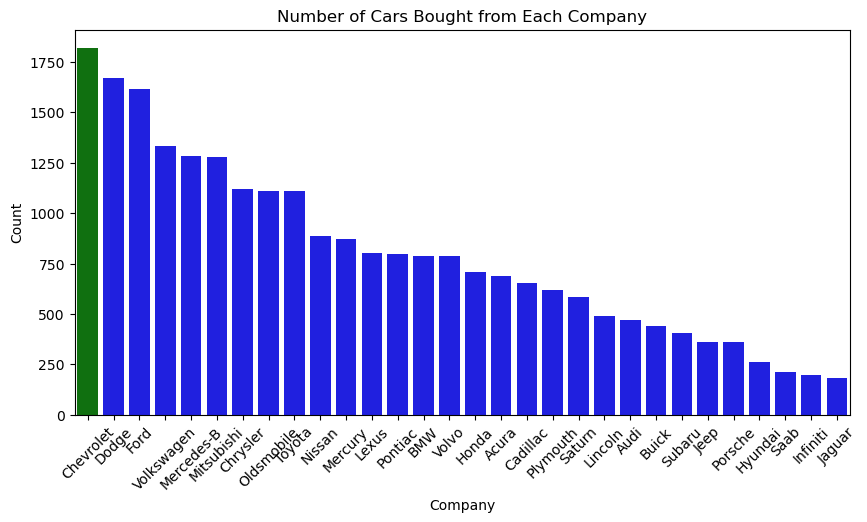

In [46]:
plt.figure(figsize=(10, 5))
company_counts = df["Company"].value_counts()
colors = ["green" if count == company_counts.max() else "blue" for count in company_counts]  # Highlight max
sns.barplot(x=company_counts.index, y=company_counts.values, palette=colors)
plt.xticks(rotation=45)
plt.title("Number of Cars Bought from Each Company")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

- [x] **Create a plot that shows the average price per body style.**

C:\Users\micro\AppData\Local\Temp\ipykernel_22652\330797150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_style_avg.index, y=body_style_avg.values, palette=colors)


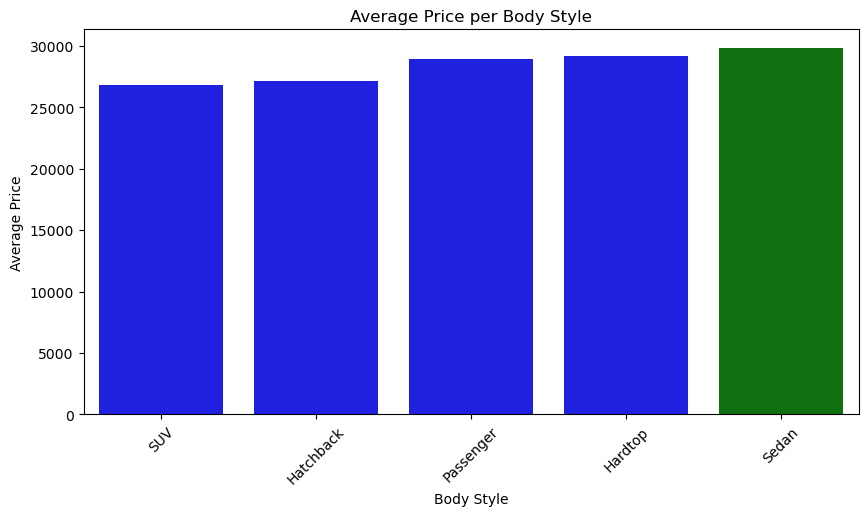

In [48]:
plt.figure(figsize=(10, 5))
body_style_avg = df.groupby("Body Style")["Price ($)"].mean().sort_values()
colors = ["green" if price == body_style_avg.max() else "blue" for price in body_style_avg]  # Highlight max
sns.barplot(x=body_style_avg.index, y=body_style_avg.values, palette=colors)
plt.xticks(rotation=45)
plt.title("Average Price per Body Style")
plt.xlabel("Body Style")
plt.ylabel("Average Price")
plt.show()

- [x] **Create a plot that shows the count of the top 10 models.**

C:\Users\micro\AppData\Local\Temp\ipykernel_22652\3789396917.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_models.index, y=top_10_models.values, palette=colors)


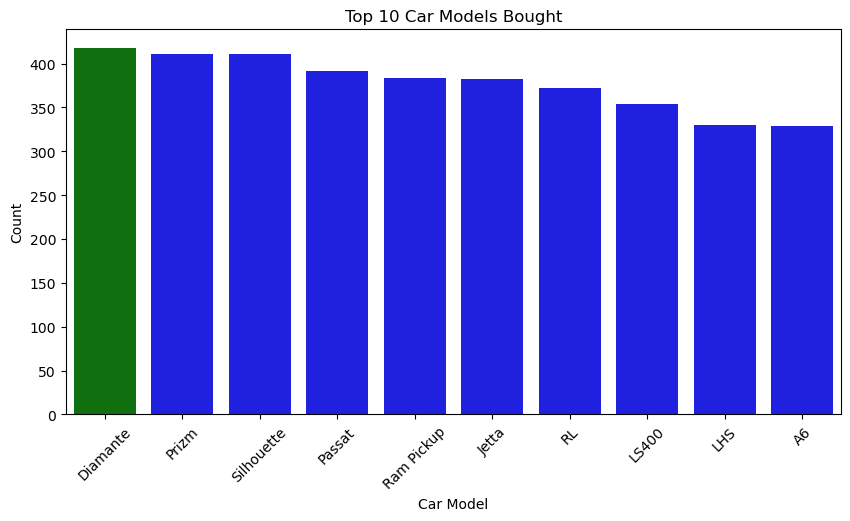

In [81]:
top_10_models = df["Model"].value_counts().sort_values(ascending=False).head(10)

colors = ["green" if count == top_10_models.max() else "blue" for count in top_10_models]  # Highlight max
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_models.index, y=top_10_models.values, palette=colors)
plt.xticks(rotation=45)
plt.title("Top 10 Car Models Bought")
plt.xlabel("Car Model")
plt.ylabel("Count")
plt.show()

- [x] **Create a plot that shows the colors of the cars that are most bought.**

C:\Users\micro\AppData\Local\Temp\ipykernel_22652\1810636366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)


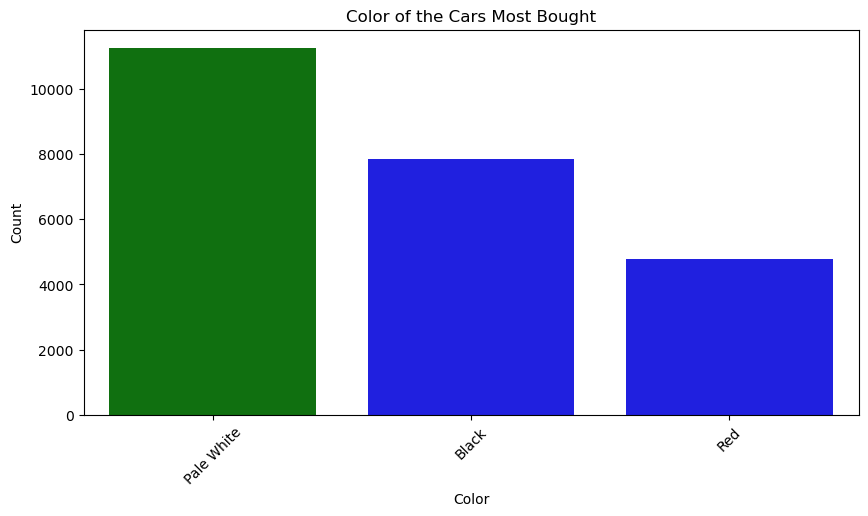

In [54]:
plt.figure(figsize=(10, 5))
color_counts = df["Color"].value_counts()
colors = ["green" if count == color_counts.max() else "blue" for count in color_counts]  # Highlight max
sns.barplot(x=color_counts.index, y=color_counts.values, palette=colors)
plt.xticks(rotation=45)
plt.title("Color of the Cars Most Bought")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

- [x] **Create a density plot for the price vs engine columns**

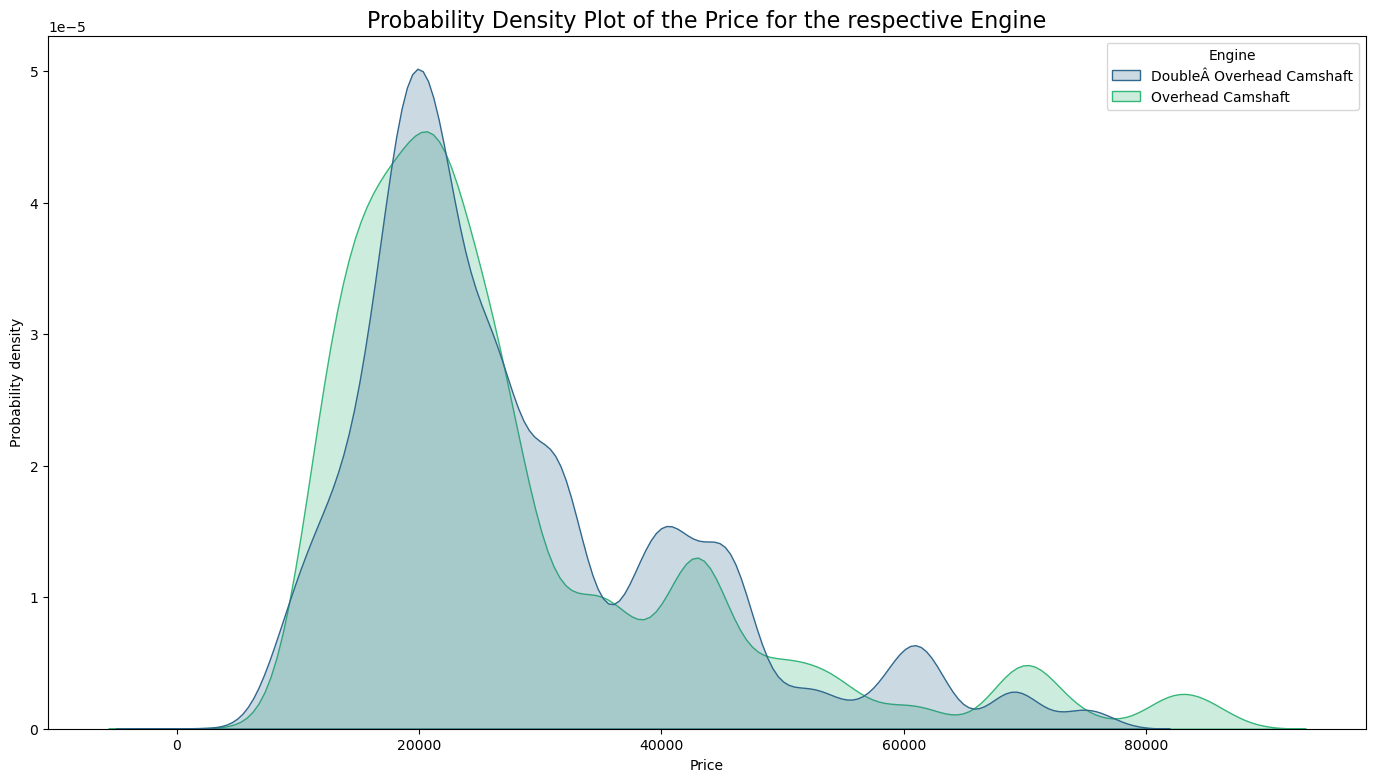

In [138]:
plt.figure(figsize=(17, 9))
sns.kdeplot(data = df, x = 'Price ($)', hue = 'Engine', common_norm = False, fill = True, palette = 'viridis')
plt.title('Probability Density Plot of the Price for the respective Engine', fontsize = 16, fontweight = 'light')
plt.xlabel('Price')
plt.ylabel('Probability density')
plt.show()

- [x] **Check the minimum and maximum values for the car prices and create a disparity variable for that.**

In [91]:
p_max = df["Price ($)"].max()
p_min = df["Price ($)"].min()

p_disparity = p_max-p_min
print(p_disparity)  # 84600
print(p_max)  # 85800
print(p_min)  # 1200

84600
85800
1200


- [x] **Plot the distribution of prices using a histogram**

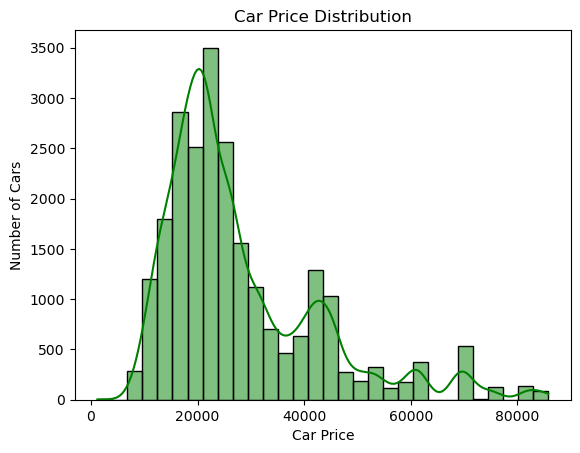

In [28]:

sns.histplot(df["Price ($)"], bins=30, kde=True, color="green")
plt.title("Car Price Distribution")
plt.ylabel("Number of Cars")
plt.xlabel("Car Price")
plt.show()

- [x] **Create a bar chart of the top 10 most sold cars**

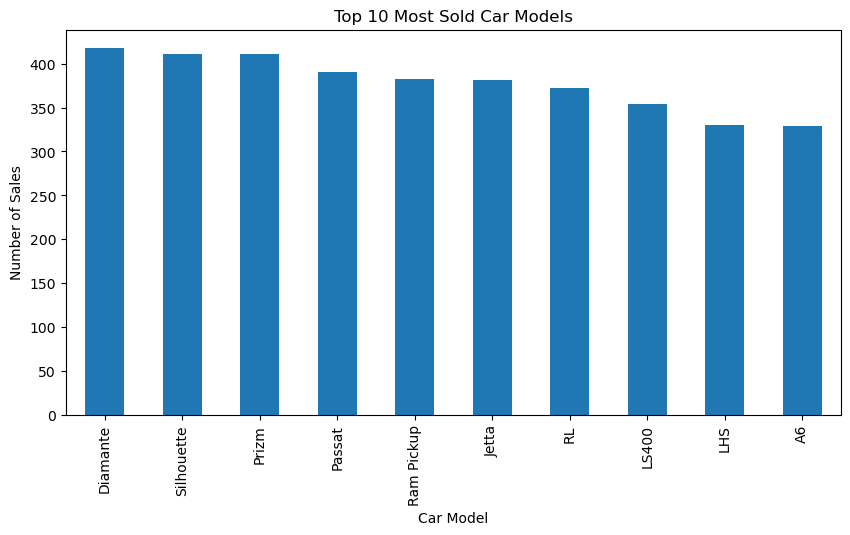

In [30]:
df["Model"].value_counts().head(10).plot(kind="bar", figsize=(10,5))  # I dont like this code, change it
plt.title("Top 10 Most Sold Car Models")
plt.xlabel("Car Model")
plt.ylabel("Number of Sales")
plt.show()

- [x] **Create a plot that gives us the gender distribution**

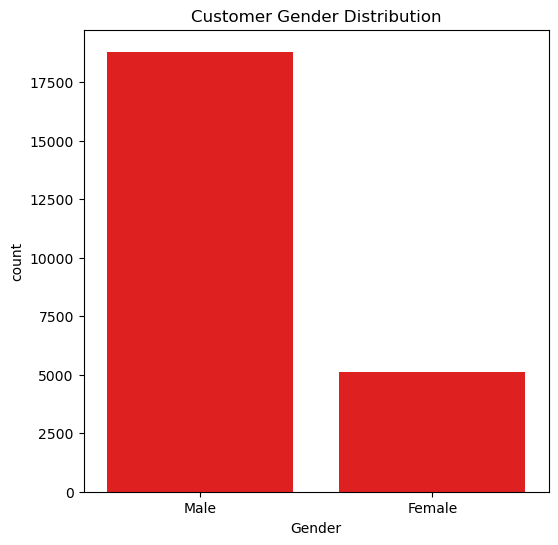

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender", data=df, color="red")
plt.title("Customer Gender Distribution")
plt.show()

# This result is to be expected

- [x] **Create a scatter plot of Income and Car Price**

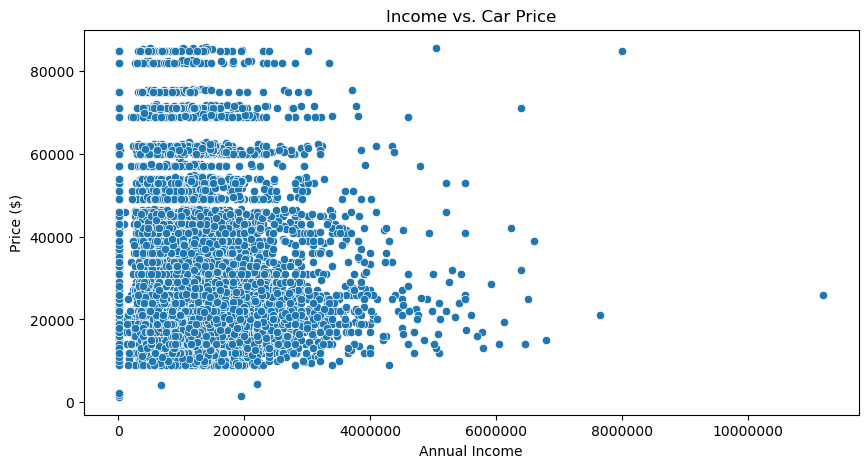

In [55]:
import matplotlib.ticker as ticker  

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=df["Annual Income"], y=df["Price ($)"])
plt.title("Income vs. Car Price")

# We'll need this in order to show the actual values of the annual income and not 10^7 in scientific notation

ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='x')

plt.show()

- [x] **Create a boxplot of Car price by transmission type**

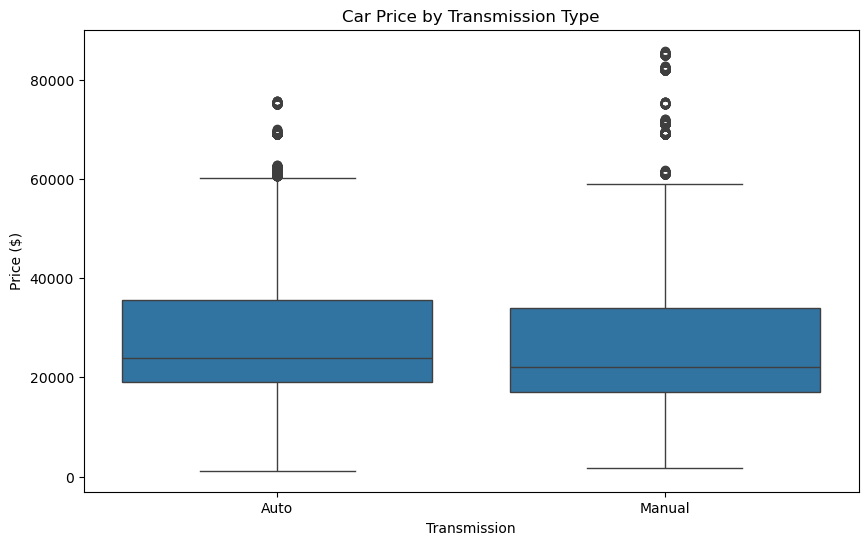

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price by Transmission Type")
plt.show()

# As we can see, all of them are outliers, as they lie beyond the whiskers and far beyond the blue box


# This indicates that the price distribution is not normal, as we've seen in the plot before
# and it also indicates that the data is likely skewed

- [x] **Use a logarithmic scale to check this boxplot**

In [77]:
import numpy as np

df["Log_Price"] = np.log1p(df["Price ($)"])  # Log transformation
sns.boxplot(x="Transmission", y="Log_Price", data=df)
plt.title("Car Price by Transmission (Log Scale)")
plt.show()

# As we can see, even in a logarithmic scale there are still only outliers
# Most prices are low, but a few cars are super expensive, and although the log transformation reduces skewness, extreme values still dominate.

# The gist of this is that most prices are very tight together, which makes the IQR (Interquartile Range)
# very tiny, hence why the extremes are underscored

# Statistical analysis must take place (in the next section)



- [x] **Create a scatter 3D plot of annual income, price, and transmission**

In [45]:
import plotly.express as px

fig = px.scatter_3d(df, x='Annual Income', y='Price ($)', z='Transmission', color='Transmission')
fig.show()

- [x] **Create a 3D barchart for the car model, price, and dealer region**

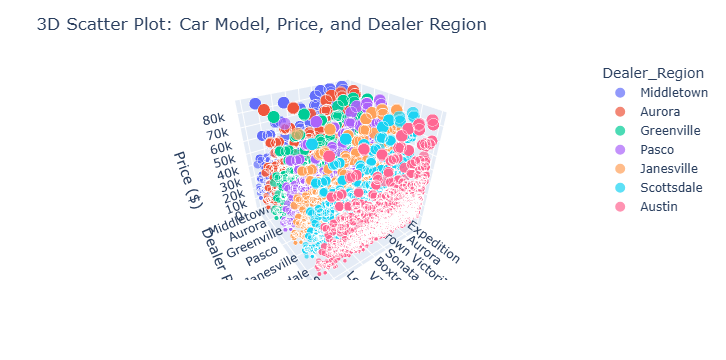

In [73]:
import plotly.express as px

fig = px.scatter_3d(df, x='Model', y='Dealer_Region', z='Price ($)', color='Dealer_Region', size='Price ($)')

fig.update_layout(title="3D Scatter Plot: Car Model, Price, and Dealer Region",
                  scene=dict(xaxis_title="Car Model",yaxis_title="Dealer Region",zaxis_title="Price ($)"))

fig.show()

# This one looks pretty confusing

add more things from here: https://www.kaggle.com/code/dohaaaaaz/car-sales-eda-trends-ml#Handling-outliers

# Data Science (Using the Pandas Library)

## 4. Inferential Statistics

- [x] **Use the "describe" statement to see what's happening in the price column**

In [103]:
print(df["Price ($)"].describe())

count    23906.000000
mean     28090.247846
std      14788.687608
min       1200.000000
25%      18001.000000
50%      23000.000000
75%      34000.000000
max      85800.000000
Name: Price ($), dtype: float64


- The fact that the mean is higher than the median indicates the data is likely right-skewed, with a few high-priced cars (luxury or premium) pulling the average price up. The large gap between Q3 (34,000 dollars) and the max price (85,800 dollars) confirms that there are some outliers or extreme high-priced cars.

- The range is quite large (1,200 to 85,800 dollars), which is causing a bimodal-like effect in your violin plot, where most of the cars are concentrated at the lower end, but a small number of cars are pulling the price distribution upwards.

- [x] **Using the 25th and 75th percentiles, remove the more extreme outliers from the price column, and plot it again**

In [95]:
Q1 = df["Price ($)"].quantile(0.25)
Q3 = df["Price ($)"].quantile(0.75)
IQR = Q3 - Q1

# Remove extreme outliers (e.g., 1.5×IQR rule or set your own thresholds)
df_filtered = df[(df["Price ($)"] >= Q1 - 3*IQR) & (df["Price ($)"] <= Q3 + 3*IQR)]

# Now plot without extreme outliers
sns.boxplot(x="Transmission", y="Price ($)", data=df_filtered)
plt.title("Car Price by Transmission (Filtered Outliers)")
plt.show()

# As we can see, even with the 3*IQR there are still many outliers

- [x] **Use a violin plot to visualiza this distribution better**

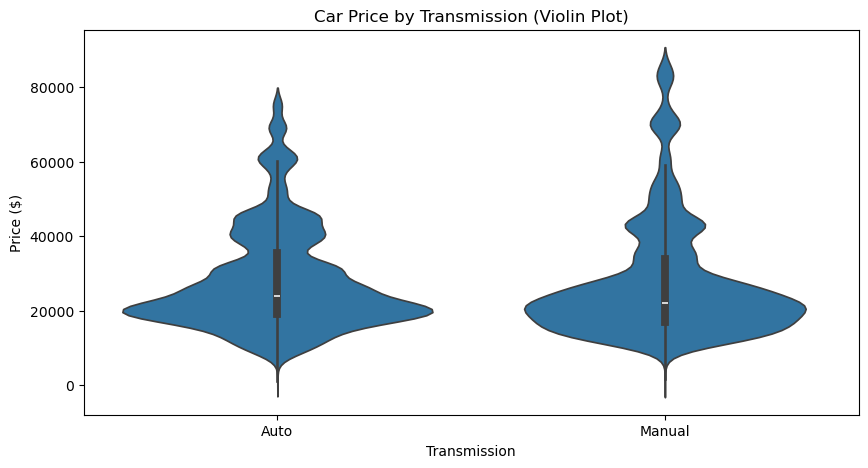

In [99]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Transmission", y="Price ($)", data=df)
plt.title("Car Price by Transmission (Violin Plot)")
plt.show()

- This sort of shape for the violin plot suggests that there are two clusters of data (or segments), which we will see in the KMeans Clustering section.

- The few very expensive cars create the narrow "spike" we see for both transmission types

## 5. PCA (Principal Component Analysis)

- [x] **Use a PCA to see if we can we reduce the dimensionality of the car sales dataset while retaining meaningful patterns in the data.**

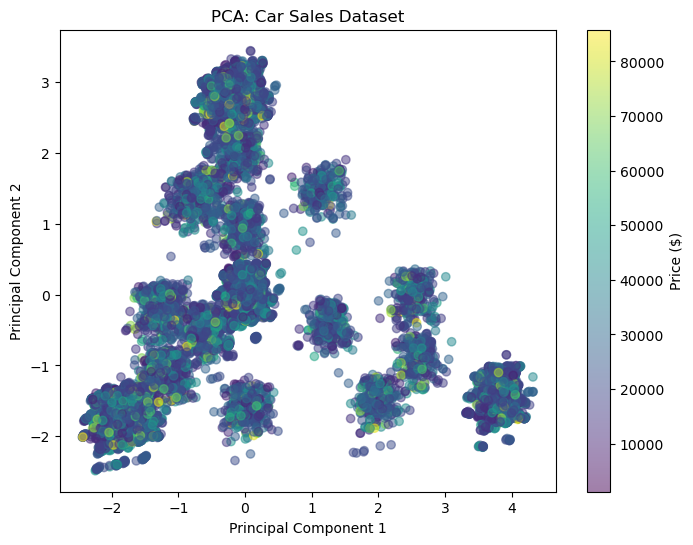

In [277]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.drop(['Price ($)', 'Car_id', 'Date', 'Customer Name', 'Phone'], axis=1)  
y = df['Price ($)']  

X = pd.get_dummies(X, drop_first=True)  # Converts categorical data into numerical format

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y  


plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='viridis', alpha=0.5)
plt.title("PCA: Car Sales Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Price ($)')
plt.show()


### Model's conclusions



## 6. Random Forest

- [x] **Use a Random Forest model, coupled with feature importance, to help us understand which features (columns) in this dataset contribute the most to the model’s predictions**

In [284]:
from sklearn.ensemble import RandomForestRegressor  # Use RandomForestClassifier for classification tasks
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("car_sales.csv")

X = df.drop(['Price ($)', 'Car_id', 'Date', 'Customer Name','Phone'], axis=1)  
y = df['Price ($)']  

X = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_df = pd.DataFrame({'Feature': X.columns,'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_df)

              Feature    Importance
1             Cluster  7.053934e-01
214  Color_Pale White  2.222285e-02
0       Annual Income  1.669598e-02
215         Color_Red  1.561860e-02
92       Model_Catera  7.154396e-03
..                ...           ...
146     Model_LeSabre  5.492138e-06
69       Model_Accent  3.348931e-06
205         Model_V70  1.972915e-06
172       Model_RX300  1.650330e-06
121    Model_Firebird  8.865630e-07

[232 rows x 2 columns]


### Model's conclusions



- [x] **Use a random forest model to predict car prices using features like car model, body style, and dealer region.**

In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df = pd.read_csv("car_sales.csv")

X = df.drop(['Price ($)', 'Car_id', 'Date', 'Customer Name','Phone'], axis=1)   
y = df['Price ($)']  

X = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("The mean squared error value is:", mse)
print("The mean absolute error value is:", mae)
print("The root mean squared error value is:", rmse )
print("The r2 value is:", r2)


The mean squared error value is: 80928015.91197993
The mean absolute error value is: 4506.887061902107
The root mean squared error value is: 8995.999995107823
The r2 value is: 0.6176723328659123


### Model's conclusions

- R² Value (0.62): The model explains 62% of the variance in car prices, indicating moderate predictive power.

- MAE (4,507 dollars): On average, the model’s predictions are off by about $4,507.

- RMSE (8,996 dollars): The model has a significant prediction error of around $9,000 per car.

- Model Performance: While the model shows moderate performance, it leaves room for improvement, especially in reducing prediction errors.

- [x] **Try hyperparameter tunning**

In [300]:
from sklearn.model_selection import GridSearchCV


param_grid = {'n_estimators': [50, 100],'max_depth': [None, 10],
              'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}


grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,           # number of folds
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


## Conclusions

The best Hyperparameters are:

- n_estimators = 100: Optimal number of trees in the forest.

- max_depth = None: Trees are allowed to grow without depth restrictions, capturing more complexity.

- min_samples_split = 5: Nodes need at least 5 samples to split, preventing overfitting.

- min_samples_leaf = 2: Leaves must have at least 2 samples, offering regularization.

These parameters aim to improve model performance by controlling tree growth and preventing overfitting, which should lead to better generalization of unseen data.


## 7. KMeans Clustering

- [x] **Segment the prices of the cars into the two categories "high price" and "low price" like we've seen before.**

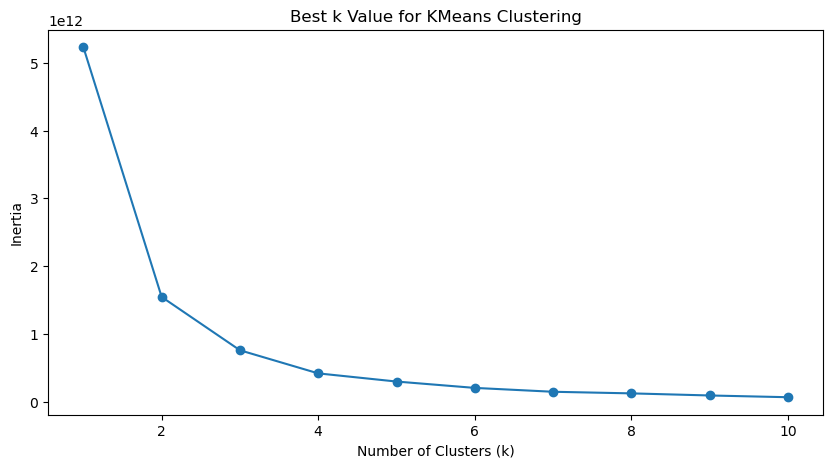

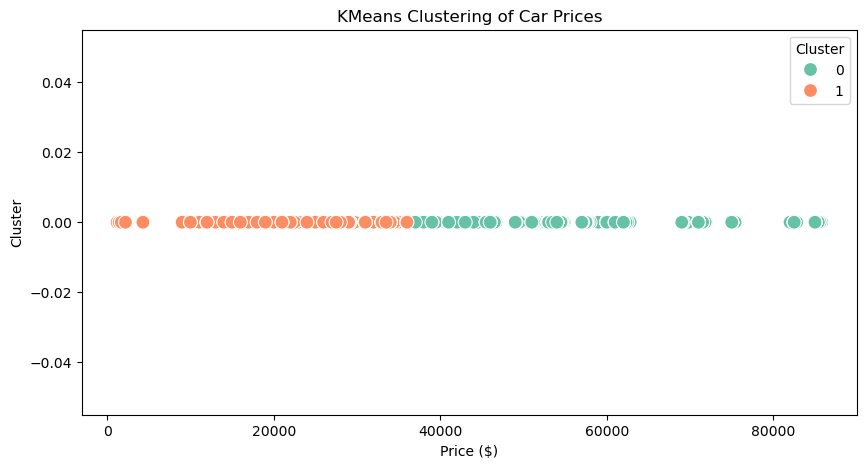

In [267]:
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.preprocessing import StandardScaler 


df = pd.read_csv("car_sales.csv")



X = df[["Price ($)"]]  # Use just the Price column for clustering

# Step 2: Use the Elbow Method to determine the optimal k
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Best k Value for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Step 3: Fit KMeans with k=2 (likely based on the elbow plot)
k = 2
km = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = km.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Price ($)"], y=[0] * len(df), hue=df["Cluster"], palette="Set2", s=100)
plt.title("KMeans Clustering of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Cluster")
plt.show()

### Model's conclusions

- 

## 8. Linear Regression

- [x] **Use a Linear Regression model to predict the car price using the Engine, Body Style, Color, Dealer Region, Car Model, Company**

In [256]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = df[["Engine", "Body Style", "Color", "Dealer_Region", "Model", "Company"]]  # Features
y = df["Price ($)"]  

X_encoded = pd.get_dummies(X, drop_first=True)  

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.2)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Car Prices")
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.show()


Mean Absolute Error (MAE): 9500.82277289837
Mean Squared Error (MSE): 164092027.75841698
Root Mean Squared Error (RMSE): 12809.841051254967
R-squared: 0.2247811655680234


### Model's conclusions


- MAE = 9500.82277289837 -> On average, predictions are off by $9,500.

- RMSE ≈ $12,809 -> Large errors exist, suggesting poor model fit.

- Low $R^2$ (0.22) means that only 22.5% of the variance in car prices is explained by the model.

- This means most price variation is left unexplained, indicating weak predictive power.

Possible Issues:

- The relationship between features (Engine, Body Style, Color, Dealer Region, Car Model, Company) and Price may be non-linear, making linear regression a poor choice.

- Important factors like mileage, demand, fuel type, or optional features may be missing.

- Outliers in price could very well be skewing the results.

## 10. Neural Networks

- [x] **Use a classification neural network model to predict the the "will buy" column (that you'll create)**

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

df = pd.read_csv("car_sales.csv")


# For simplicity, let's assume if the car's price is greater than a threshold, the customer is likely to buy it.

price_threshold = 30000
df["Will Buy"] = (df["Price ($)"] > price_threshold).astype(int)


X = df[["Engine", "Body Style", "Color", "Company", "Annual Income"]]  # Include relevant features
y = df["Will Buy"]  # Target is "Will Buy" (binary: 0 or 1)

X_encoded = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to 0 or 1

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

history = model.history

plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


C:\Users\micro\ansel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6802 - loss: 0.5925 - val_accuracy: 0.7775 - val_loss: 0.4686
Epoch 2/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4386 - val_accuracy: 0.8239 - val_loss: 0.3922
Epoch 3/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.3728 - val_accuracy: 0.8425 - val_loss: 0.3494
Epoch 4/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3460 - val_accuracy: 0.8409 - val_loss: 0.3402
Epoch 5/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.3228 - val_accuracy: 0.8540 - val_loss: 0.3238
Epoch 6/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8455 - loss: 0.3197 - val_accuracy: 0.8438 - val_loss: 0.3215
Epoch 7/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8502 - loss: 0.3094 - val_accuracy: 0.8480 - val_loss: 0.3176
Epoch 8/20
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3057 - val_accuracy: 0.

KeyError: 'accuracy'

### Model's conclusions

- Good Overall Accuracy (85%) → The model performs well in general.

- Balanced Performance → Both classes have decent precision, recall, and F1-scores.

- Class 0 (Majority Class) Performs Better → 90% precision, 88% recall means it predicts Class 0 very well.

- Class 1 (Minority Class) is Weaker → 75% precision, 78% recall, indicating more misclassifications but still reasonable.

## 9. KNearest Neighbors

- [x] **Use a KNN model to predict whether a customer will buy a car ("Will Buy" column) based on the car's features**

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

df = pd.read_csv("car_sales.csv")

price_threshold = 30000
df["Will Buy"] = (df["Price ($)"] > price_threshold).astype(int)

X = df[["Engine", "Body Style", "Color", "Company", "Annual Income"]]  # Include relevant features
y = df["Will Buy"] 

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Start by trying the value n_neighbors=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Try different values of k to find the best model performance

inaccuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    inaccuracies.append(1 - accuracy)

# The optimal k is the one that has the lowest error, which seems to be k=13

import matplotlib.pyplot as plt
plt.plot(range(1, 21), inaccuracies)
plt.title('Error vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.show()


Accuracy: 0.8446256796319531

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3300
           1       0.75      0.74      0.75      1482

    accuracy                           0.84      4782
   macro avg       0.82      0.82      0.82      4782
weighted avg       0.84      0.84      0.84      4782



### Model's conclusions

- By plugging k=13 in the above code, we see that the model does indeed perform better, although just slightly (but still better!)

- Based on the model's performance (accuracy of 84.94%), we ascertain that this model is a better predictor than random chance. This suggests that the features in the dataset are indeed informative for predicting whether a customer will buy a car, so, in layman's terms, features like Engine, Body Style, Color, etc., are good predictors of whether a customer will purchase a car.

## 11. Gradient Boosting

- [x] **Use a gradient boosting model to predict a customer's gender based on their Annual Income, Car Model, Body Style, and Dealer Region.**

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix


X = df[["Annual Income", "Model", "Body Style", "Dealer_Region"]]
y = df["Gender"]

X = pd.get_dummies(X, drop_first=True)  

le = LabelEncoder()
y = le.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c_r = classification_report(y_test, y_pred, target_names=le.classes_)
c_m = confusion_matrix(y_test, y_pred)


print("Classification Report:\n", c_r)


plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Gender")
plt.ylabel("Actual Gender")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


C:\Users\micro\ansel\Lib\site-packages\xgboost\core.py:158: UserWarning:

[02:39:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Classification Report:
               precision    recall  f1-score   support

      Female       0.21      0.01      0.01       987
        Male       0.79      0.99      0.88      3795

    accuracy                           0.79      4782
   macro avg       0.50      0.50      0.45      4782
weighted avg       0.67      0.79      0.70      4782



### Model's conclusions

- Severe Class Imbalance: The model overwhelmingly predicts "Male" and fails to identify "Female" customers.

- Poor Female Prediction: Only 7 out of 987 Females were correctly classified (1% recall).

- Bias Toward Male: 99% recall for Males, meaning almost all predictions default to "Male".

- Unreliable Model: High accuracy (79%) is misleading due to class imbalance.

## 12. Logistic Regression

- [x] **Use a Logistic Regression model to predict the car model based on Transmission, and Body Style**

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      2500
           1       0.72      0.72      0.72      2282

    accuracy                           0.73      4782
   macro avg       0.73      0.73      0.73      4782
weighted avg       0.73      0.73      0.73      4782



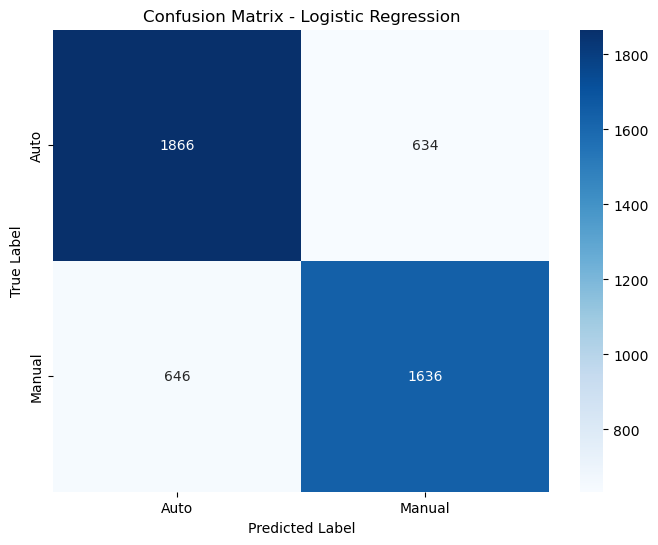

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df[["Model", "Body Style","Dealer_Region"]]
y = df["Transmission"]


X = pd.get_dummies(X, drop_first=True)  
le = LabelEncoder()
y = le.fit_transform(y)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c_r = classification_report(y_test, y_pred)
c_m = confusion_matrix(y_test, y_pred)


print("Classification Report:\n", c_r)

plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Model's conclusions



## 13. Time Series and Forecasting

We will suppose that the price column is something that varies over time so that we can perform a time series analysis. We must turn the date column into our index and go from there.

- [x] **Visualizing price Trends Over Time**

C:\Users\micro\AppData\Local\Temp\ipykernel_20872\158758750.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



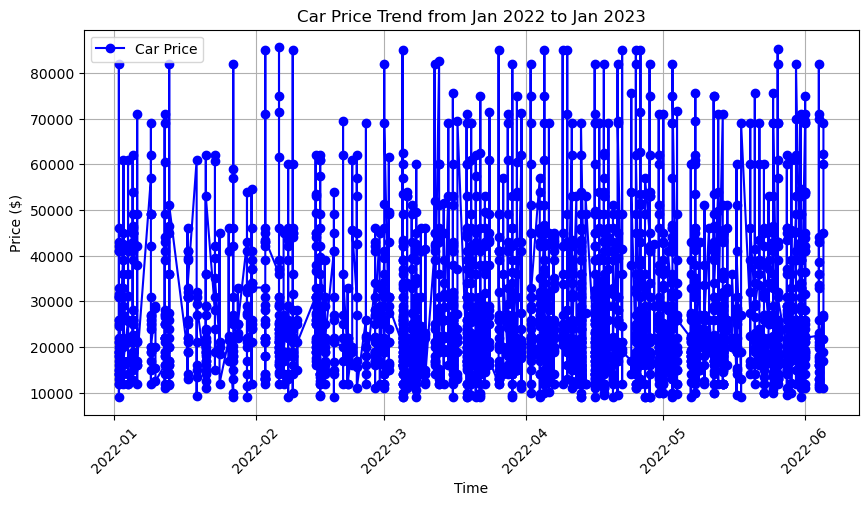

In [179]:

df=pd.read_csv("car_sales.csv")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.set_index('Date', inplace=True)

# Filter data for the date range from 2022-01-01 to 2022-06-06
df_filtered = df['2022-01-01':'2022-06-06']

df_filtered.dropna(subset=['Price ($)'], inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price ($)"], marker="o", linestyle="-", color="b", label="Car Price")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title("Car Price Trend from Jan 2022 to Jan 2023")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

# It looks outrageous, too many data points

- [x] **Check for Seasonality**

C:\Users\micro\AppData\Local\Temp\ipykernel_20872\722040294.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



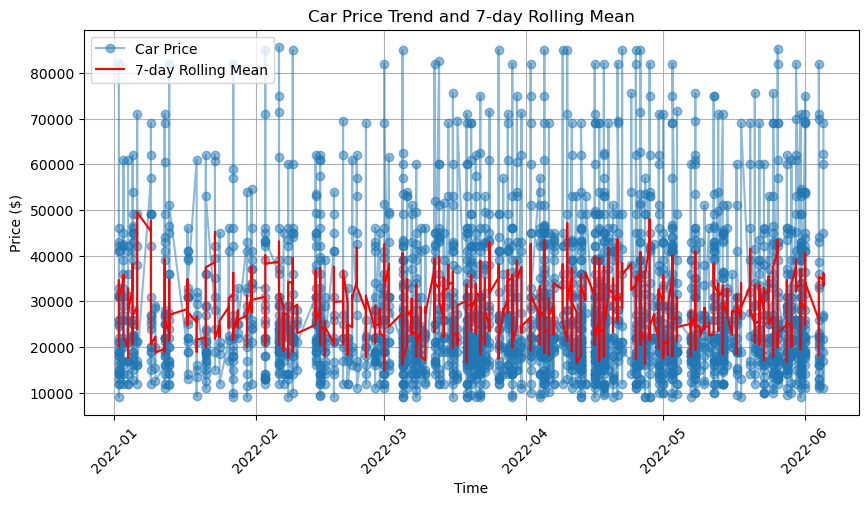

In [181]:
# Apply a 7-day rolling mean to the 'Price ($)' column

df_filtered["Price_rolling"] = df_filtered["Price ($)"].rolling(window=7, center=True).mean()  # 7-day rolling mean

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price ($)"], marker="o", linestyle="-", alpha=0.5, label="Car Price")
plt.plot(df_filtered.index, df_filtered["Price_rolling"], linestyle="-", color="red", label="7-day Rolling Mean")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title("Car Price Trend and 7-day Rolling Mean")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


- [x] **Check for Stationarity**

In [183]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_filtered["Price ($)"])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# It is stationary (p-value < 0,05), so we don't need to apply differencing, however, I'll leave it here:

# df["price_diff"] = df["price"].diff().dropna()

# Since the p-value is very low, we can reject the null hypothesis

ADF Statistic: -56.5140937738682
p-value: 0.0


- [x] **Perform a seasonality decomposition (original data, trend, seasonality, and residuals)**

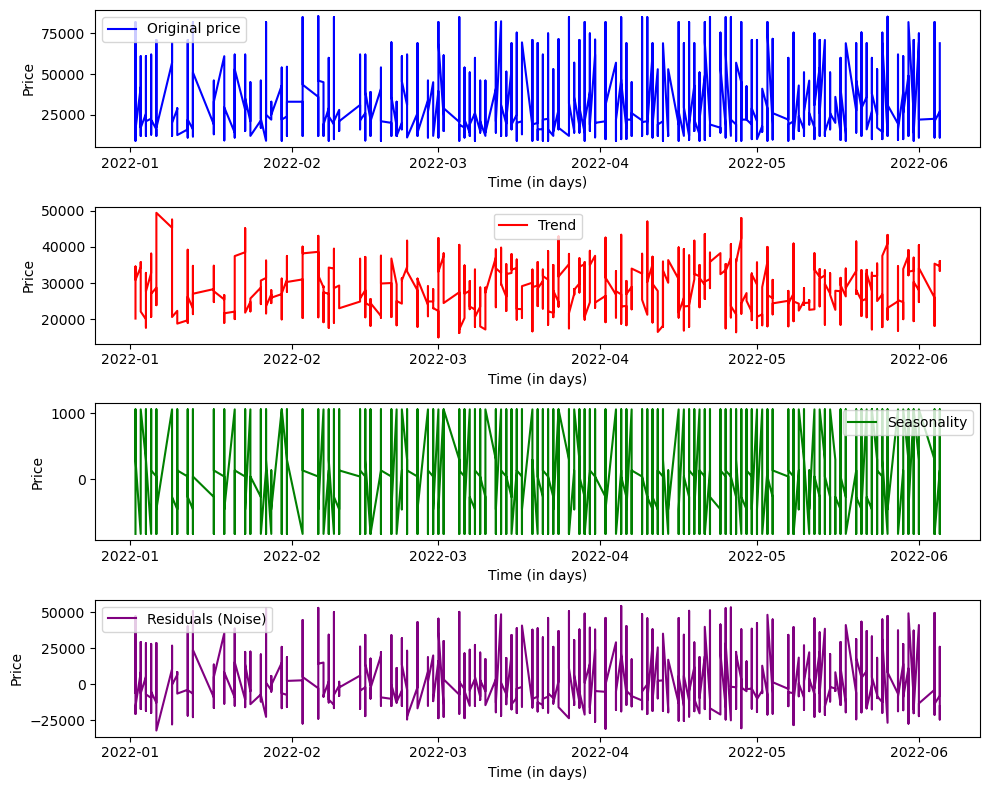

In [185]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_filtered["Price ($)"], model="additive", period=7)  # period=7 for weekly seasonality

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df_filtered.index, df_filtered["Price ($)"], label="Original price", color="blue")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residuals (Noise)", color="purple")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.legend()

plt.tight_layout()
plt.show()

# Clearly, there is too much data if we use the data available from 2022-01 to 2024-01,
# we can't really ascertain anything. Let's reduce it to 2023-01

- [x] **Try the ARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\AppData\Local\Temp\ipykernel_20872\3572132617.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

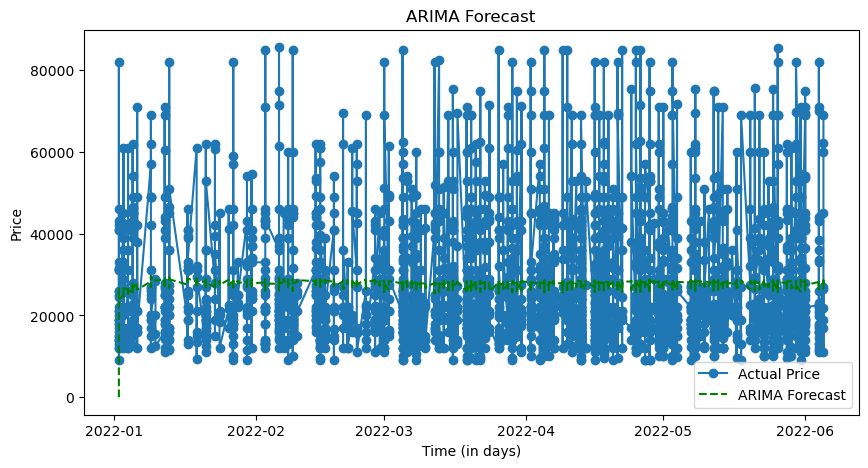

In [189]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model (p,d,q) -> Use (1,1,1) as a start
model = ARIMA(df_filtered["Price ($)"], order=(1, 1, 1))
fit = model.fit()

df_filtered["ARIMA Price ($)"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price ($)"], label="Actual Price", marker="o")
plt.plot(df_filtered.index, df_filtered["ARIMA Price ($)"], label="ARIMA Forecast", linestyle="--", color="green")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("ARIMA Forecast")
plt.show()

- [x] **Try the SARIMA model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\AppData\Local\Temp\ipykernel_20872\3858849292.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



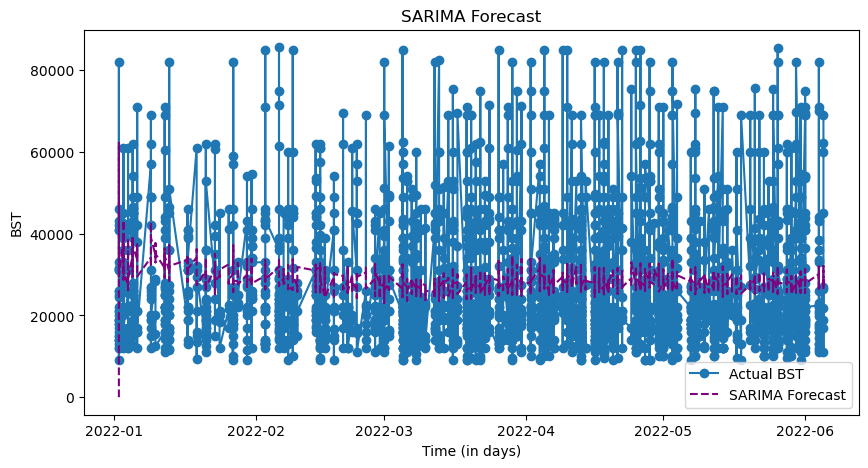

In [191]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (p,d,q) x (P,D,Q,s) where s = seasonal period
model = SARIMAX(df_filtered["Price ($)"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fit = model.fit()

df_filtered["SARIMA Price ($)"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price ($)"], label="Actual BST", marker="o")
plt.plot(df_filtered.index, df_filtered["SARIMA Price ($)"], label="SARIMA Forecast", linestyle="--", color="purple")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("SARIMA Forecast")
plt.show()


- [x] **Try the Exponential Smoothing model**

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\micro\AppData\Local\Temp\ipykernel_20872\1604111821.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



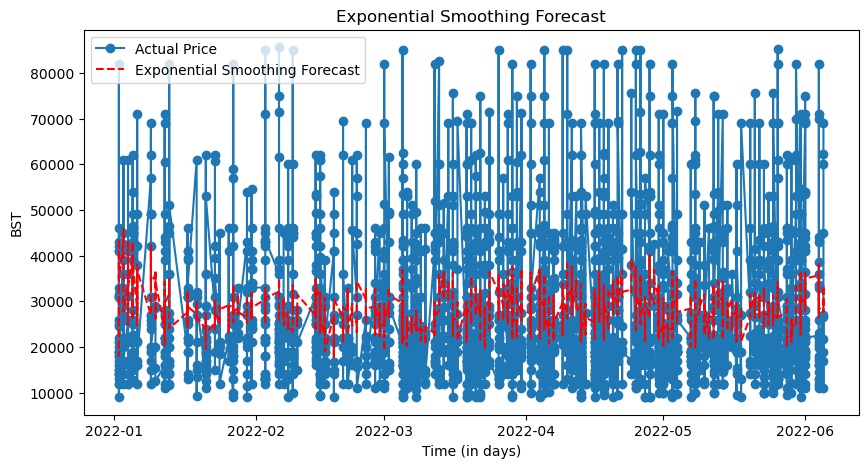

In [197]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df_filtered["Price ($)"], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()
df_filtered["Price forecast"] = fit.fittedvalues

plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, df_filtered["Price ($)"], label="Actual Price", marker="o")
plt.plot(df_filtered.index, df_filtered["Price forecast"], label="Exponential Smoothing Forecast", linestyle="--", color="red")
plt.legend()
plt.xlabel("Time (in days)")
plt.ylabel("BST")
plt.title("Exponential Smoothing Forecast")
plt.show()

- [x] **Predicting future values for the next 30 days**

In [222]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_filtered["Price ($)"], order=(1, 1, 1))  
fit = model.fit()

print(fit.summary())  # Print model summary to ensure it's trained

forecast = fit.forecast(steps=30)
print(forecast)  

last_date = df_filtered.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D") # Generate future dates (30 days ahead)
future_df = pd.DataFrame({"Predicted_Price": forecast}, index=future_dates)

print(future_df.head())


C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:              Price ($)   No. Observations:                 2964
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -32640.895
Date:                Mon, 31 Mar 2025   AIC                          65287.789
Time:                        02:18:12   BIC                          65305.771
Sample:                             0   HQIC                         65294.261
                               - 2964                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0383      0.019     -1.981      0.048      -0.076      -0.000
ma.L1         -1.0000      0.018    -54.982      0.000      -1.036      -0.964
sigma2      2.163e+08   8.41e-11   2.57e+18      0.0

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\micro\ansel\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



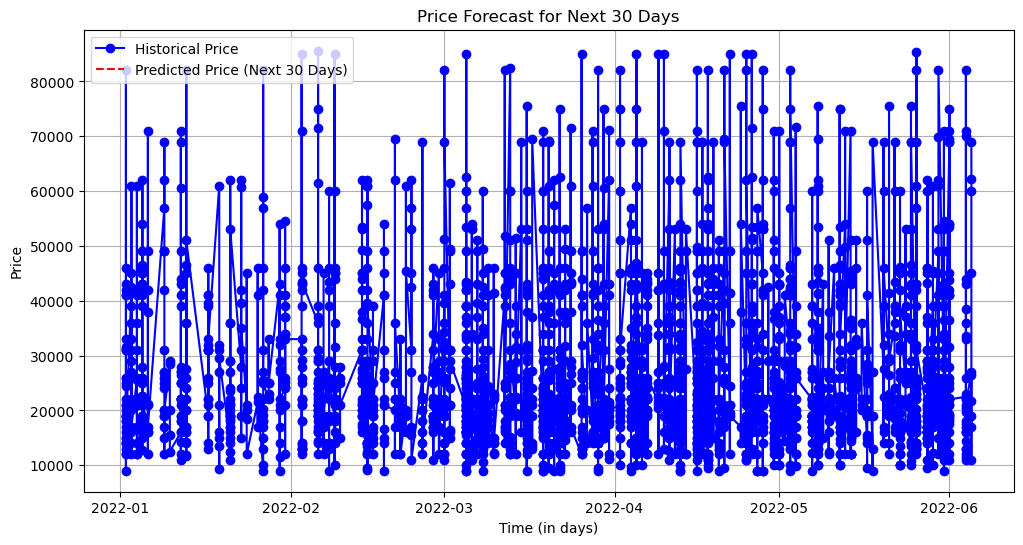

In [211]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered["Price ($)"], label="Historical Price", marker="o", color="blue")
plt.plot(future_df.index, future_df["Predicted_Price"], label="Predicted Price (Next 30 Days)", linestyle="--", color="red")
plt.xlabel("Time (in days)")
plt.ylabel("Price")
plt.title("Price Forecast for Next 30 Days")
plt.legend()
plt.grid()

plt.show()

# As expected, it doesn't show the prediction of the next 30 days, since
# future dates is comprised of NaN values only.


# The series is stationary (p_value = 0) but has no visible trend or seasonality

# Since the data does not exhibit any clear seasonality or trend,
# this will not work, as it shouldn't for the ARIMA model. 

# Transfering the data to MySQL

- [x] **Save the original dataset with fixed columns**

In [ ]:
df = pd.read_csv("car_sales.csv")

df.rename(columns={"Price ($)": "Price"}, inplace=True)

df.columns = [col.replace(" ", "_") for col in df.columns]

df.to_csv("SQL_car_sales.csv")

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:
df = pd.read_csv("clean_car_sales.csv")

df.rename(columns={"Price ($)": "Price"}, inplace=True)

df.columns = [col.replace(" ", "_") for col in df.columns]

df.to_csv("SQL_clean_car_sales.csv")

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
